In [1]:
%matplotlib inline
import slippy.surface as S  # surface generation and manipulation
import numpy as np          # numerical functions
import pandas as pd
from scipy.stats import rv_histogram
import matplotlib.pyplot as plt
from Artificial_surface import surf_from_Cq
from get_PSD import radial_2d
np.random.seed(0)

Surface height of Sample1

(<Figure size 640x480 with 1 Axes>,
 [<AxesSubplot: title={'center': 'Surface profile'}, xlabel='x', ylabel='y'>])

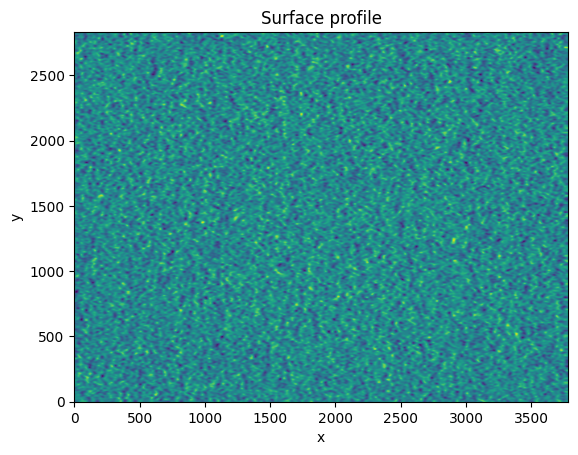

In [25]:
surf_height = pd.read_csv("/home/mohanty/PycharmProjects/Digital-twin-for-hard-disk-spacer-ring-defect-detection/Spacer_Inspection/ｓ１/ｈｅｉｇｈｔ１_corrected.csv",delimiter=',')
surf_height.fillna(surf_height.mean(), inplace=True)
#surf_height = np.array(surf_height)[:767,:767]
slippy_s = S.assurface(surf_height)
slippy_s.grid_spacing = 3.697 # Data from original height1.csv -> "XY calibration"
slippy_s.get_psd()
slippy_s.show(['profile'], ['image', 'image'])

**1. Synthesizing Surface from own PSD method**

In [19]:
PSD = radial_2d(slippy_s.profile,slippy_s.grid_spacing)

/home/mohanty/PycharmProjects/Digital-twin-for-hard-disk-spacer-ring-defect-detection/get_PSD.py:95: RuntimeWarning: Mean of empty slice
  C_AVE[j] = np.nanmean(Cq_flat.take(indices=ind[j]))


In [20]:
art_s_psd = surf_from_Cq(PSD['Cq'], slippy_s.grid_spacing)
slippy_s_PSD = S.assurface(art_s_psd)

(<Figure size 640x480 with 1 Axes>,
 [<AxesSubplot: title={'center': 'Auto correlation function'}, xlabel='x', ylabel='y'>])

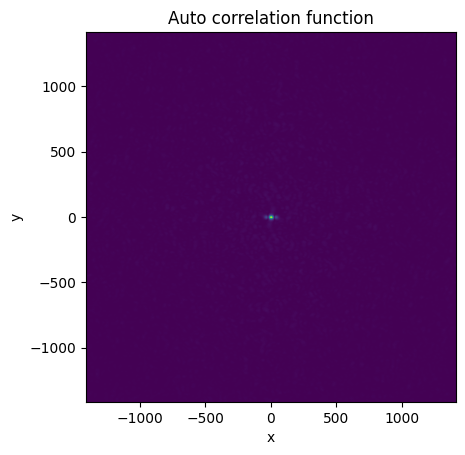

In [21]:
slippy_s_PSD.grid_spacing = slippy_s.grid_spacing
slippy_s_PSD.show(['ACF'], ['image', 'image'])

In [22]:
rou = slippy_s.roughness(['sa', 'sq', 'ssk', 'sku'], no_flattening = True)
nam = ['Mean abs height: ', 'Root mean square height: ', 'Skew: ', 'Kurtosis: ']
for n,r in zip(nam, rou):
    print(n, r)

Mean abs height:  1.3022749997901657
Root mean square height:  1.643639069607476
Skew:  -0.03110379244297191
Kurtosis:  3.1352229468074397


In [23]:
rou2 = slippy_s_PSD.roughness(['sa', 'sq', 'ssk', 'sku'], no_flattening = True)
for n,r in zip(nam, rou2):
    print(n, r)

Mean abs height:  1.3173297129447286
Root mean square height:  1.6492661902735704
Skew:  -0.01038418232288799
Kurtosis:  2.976543465270121


**Filter Method**

In [56]:
slippy_s.get_acf()
lin_trans_surface = S.RandomFilterSurface(target_acf=slippy_s.acf, grid_spacing=slippy_s.grid_spacing)
lin_trans_surface.linear_transform(filter_shape=(35,35), gtol = 1e-5, symmetric=True, method='BFGS', max_it = 1000)

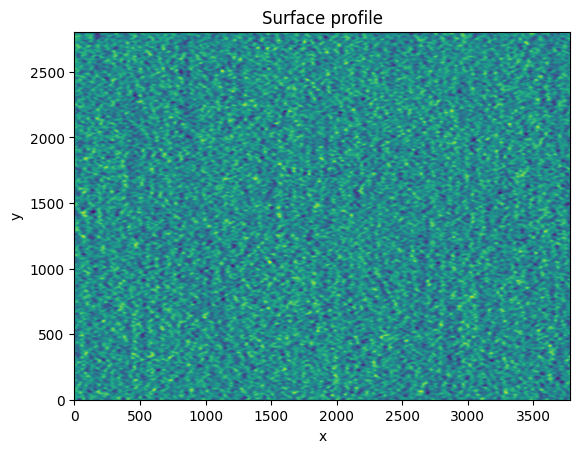

In [67]:
my_realisation = lin_trans_surface.discretise([760,1024], periodic=True, create_new=True)
fig, axes = my_realisation.show(['profile'], ['image', 'image'])

In [61]:
rou = my_realisation.roughness(['sa', 'sq', 'ssk', 'sku'], no_flattening = True)
nam = ['Mean abs height: ', 'Root mean square height: ', 'Skew: ', 'Kurtosis: ']
for n,r in zip(nam, rou):
    print(n, r)

Mean abs height:  1.339349999878284
Root mean square height:  1.678278150189128
Skew:  -0.03681010850052819
Kurtosis:  3.004986055643093


**We can also investigate how closely our generated surfae matches the target acf:**

Text(0.5, 1.0, 'Comparison along x direction')

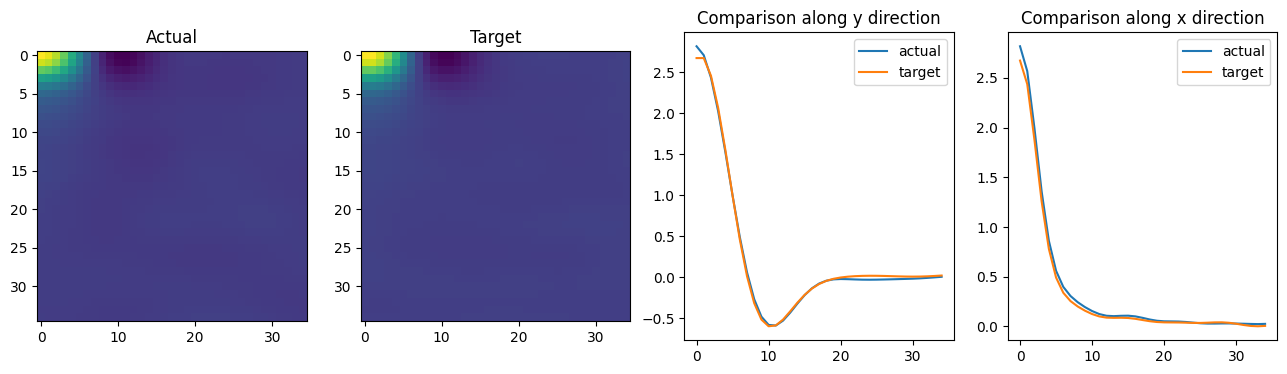

In [62]:
import matplotlib.pyplot as plt
target = lin_trans_surface.target_acf_array
actual = np.array(my_realisation.acf)
n,m = actual.shape
tn,tm = target.shape
actual_comparible = actual[n//2:n//2+tn,m//2:m//2+tm]
fig,axes = plt.subplots(1,4, figsize=(16,4))
axes[0].imshow(actual_comparible); axes[0].set_title('Actual')
axes[1].imshow(target); axes[1].set_title('Target')
axes[2].plot(actual_comparible[0,:], label='actual')
axes[2].plot(target[0,:], label='target')
axes[2].legend(); axes[2].set_title('Comparison along y direction')
axes[3].plot(actual_comparible[:,0], label='actual')
axes[3].plot(target[:,0], label='target')
axes[3].legend(); axes[3].set_title('Comparison along x direction')

In [98]:
my_surface = S.RandomPerezSurface(target_psd = slippy_s.psd,
                                  grid_spacing=slippy_s.grid_spacing,
                                  generate=True, max_it = 1000, accuracy=1e-10, exact='best')

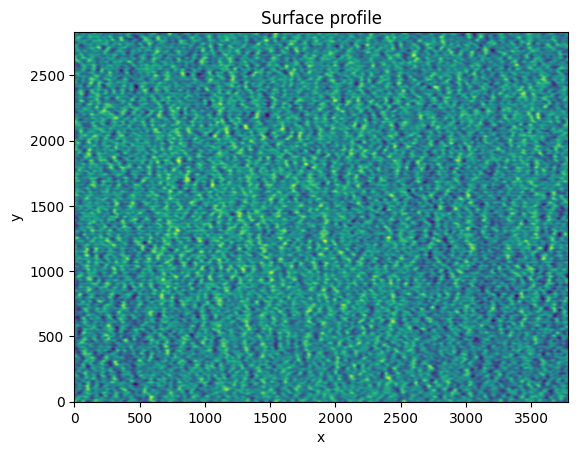

In [105]:
_ = my_surface.show(['profile'])

In [106]:
rou = my_surface.roughness(['sa', 'sq', 'ssk', 'sku'], no_flattening = True)
nam = ['Mean abs height: ', 'Root mean square height: ', 'Skew: ', 'Kurtosis: ']
for n,r in zip(nam, rou):
    print(n, r)

Mean abs height:  0.8144443752817309
Root mean square height:  1.0198498093738153
Skew:  -6.776999783354456e-05
Kurtosis:  2.96479176544006


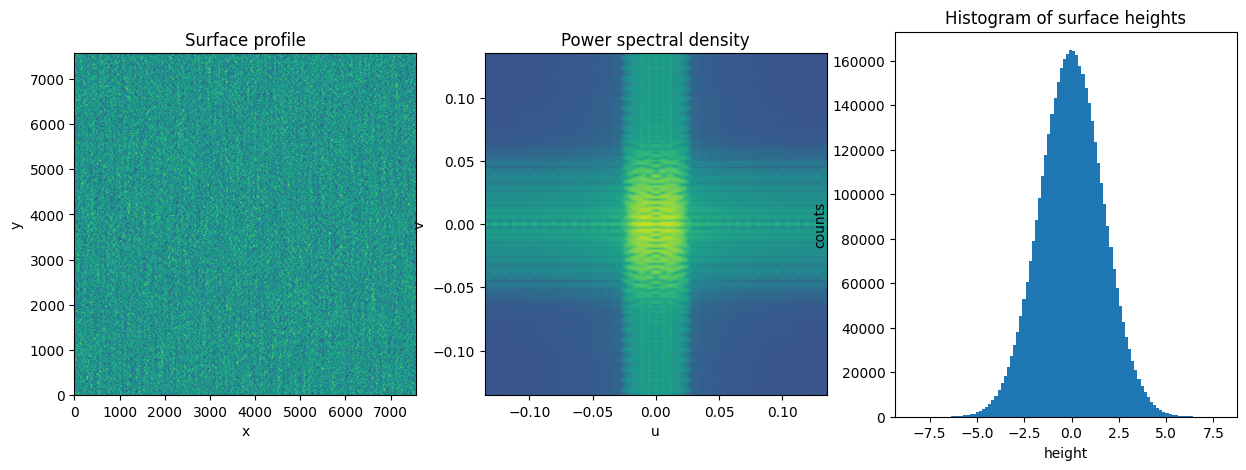

In [74]:
my_surface = lin_trans_surface.discretise([2048,2048], create_new=True)
fig, axes = my_surface.show(['profile', 'psd', 'histogram'], ['image', 'image'], figsize=(15, 5))

Text(0.5, 1.0, 'Comparison along x direction')

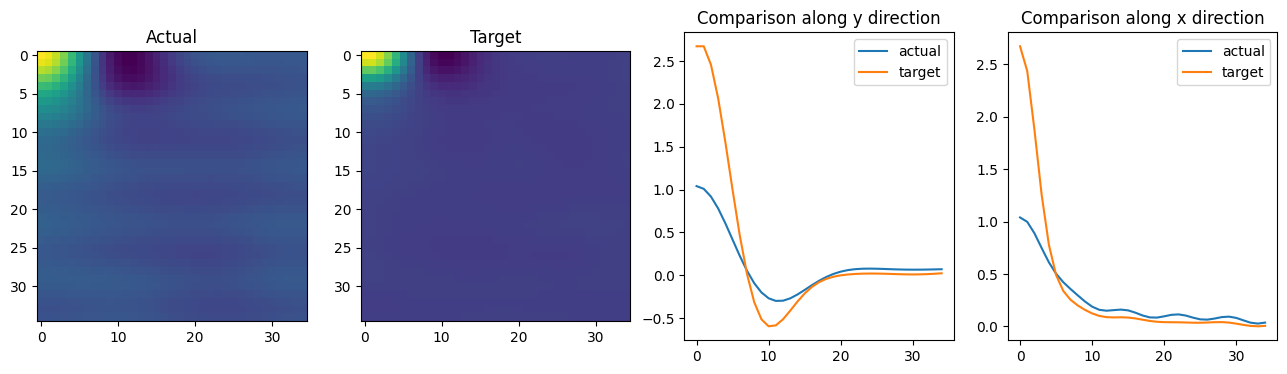

In [108]:
import matplotlib.pyplot as plt
target = lin_trans_surface.target_acf_array
actual = np.array(my_surface.acf)
n,m = actual.shape
tn,tm = target.shape
actual_comparible = actual[n//2:n//2+tn,m//2:m//2+tm]
fig,axes = plt.subplots(1,4, figsize=(16,4))
axes[0].imshow(actual_comparible); axes[0].set_title('Actual')
axes[1].imshow(target); axes[1].set_title('Target')
axes[2].plot(actual_comparible[0,:], label='actual')
axes[2].plot(target[0,:], label='target')
axes[2].legend(); axes[2].set_title('Comparison along y direction')
axes[3].plot(actual_comparible[:,0], label='actual')
axes[3].plot(target[:,0], label='target')
axes[3].legend(); axes[3].set_title('Comparison along x direction')